KNN

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

IMPORTING DATA

In [2]:
df=pd.read_csv('diabetes.xls')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y=df.iloc[::,-1]
X=df.drop(columns=['Outcome'])

TRAINING THE MODEL

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [14]:

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)



EVALUATING THE MODEL - METRICS

In [15]:

a = accuracy_score(y_test, y_pred)
print(f'Accuracy: {a}')


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7402597402597403

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        97
           1       0.65      0.63      0.64        57

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Confusion Matrix:
[[78 19]
 [21 36]]


In [24]:
# test_sample = [[12, 200, 90, 40, 600, 45.0, 2.5, 60]]  
# test_sample_scaled = scaler.transform(test_sample)

# prediction = knn.predict(test_sample_scaled)
# print("Predicted Class:", prediction[0])  # 0 = Non-Diabetic, 1 = Diabetic

# # Neighbors
# distances, indices = knn.kneighbors(test_sample_scaled)
# print("\nNearest Neighbors (indices):", indices)
# print("Nearest Neighbors (distances):", distances)

# neighbor_classes = y_train.iloc[indices[0]].values
# print("Neighbor Classes:", neighbor_classes)

# print("\nExplanation:")
# print(f"Among the {len(neighbor_classes)} nearest neighbors, "
#       f"{sum(neighbor_classes)} are Diabetic and {len(neighbor_classes)-sum(neighbor_classes)} are Non-Diabetic.")


In [23]:
# test_sample = [[6, 160, 85, 35, 150, 33.0, 0.8, 50]]  
# test_sample_scaled = scaler.transform(test_sample)

# prediction = knn.predict(test_sample_scaled)
# print("Predicted Class:", prediction[0])  

# distances, indices = knn.kneighbors(test_sample_scaled)
# print("\nNearest Neighbors (indices):", indices)
# print("\nNearest Neighbors (distances):", distances)

# neighbor_classes = y_train.iloc[indices[0]].values
# print("\nNeighbor Classes:", neighbor_classes)

# # # 8. Explain why
# # majority_class = 1 if sum(neighbor_classes) > len(neighbor_classes)//2 else 0
# # print("\nExplanation:")
# # print(f"Among the {len(neighbor_classes)} nearest neighbors, "
# #       f"{sum(neighbor_classes)} are Diabetic and {len(neighbor_classes)-sum(neighbor_classes)} are Non-Diabetic.")
# # print(f"So the model predicts this patient as {'Diabetic (1)' if majority_class==1 else 'Non-Diabetic (0)'}")


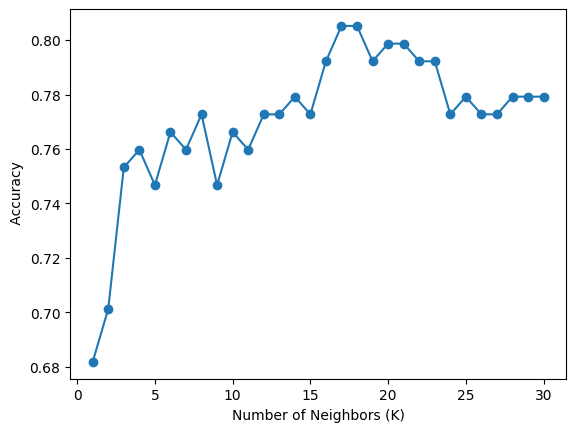

The optimal number of neighbors (k) is: 17


In [114]:
k_values = range(1, 31)  
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    a = accuracy_score(y_test, y_pred)
    scores.append(a)

plt.plot(k_values, scores, marker='o')

plt.xlabel('Number of Neighbors (K)')
plt.ylabel(' Accuracy')
plt.show()


optimal_k = k_values[np.argmax(scores)]
print(f"The optimal number of neighbors (k) is: {optimal_k}")


In [22]:
# pip install imblearn

In [20]:

from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_trains, y_train)

knn = KNeighborsClassifier(n_neighbors=17)  
knn.fit(X_train_res, y_train_res)
y_pred = knn.predict(X_test)


C:\Users\hanal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [21]:
import numpy as np

test_sample = np.array([[2, 150, 85, 30, 0, 33.6, 0.627, 50]])

test_sample_scaled = scaler.transform(test_sample)

pred_class = knn.predict(test_sample_scaled)[0]
pred_prob = knn.predict_proba(test_sample_scaled)[0]

class_names = {0: "Non-Diabetic", 1: "Diabetic"}

print(f"Test sample belongs to class: {class_names[pred_class]} ({pred_class})")
print(f"Prediction confidence → Non-Diabetic: {pred_prob[0]*100:.2f}%, Diabetic: {pred_prob[1]*100:.2f}%")


Test sample belongs to class: Diabetic (1)
Prediction confidence → Non-Diabetic: 23.53%, Diabetic: 76.47%


C:\Users\hanal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


KMEANS CLUSTERING

In [27]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [28]:
y=df.iloc[::,-1]
X=df.drop(columns=['Outcome'])

SCALING THE FEATURES

In [29]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

DETERMINING THE OPTIMAL K

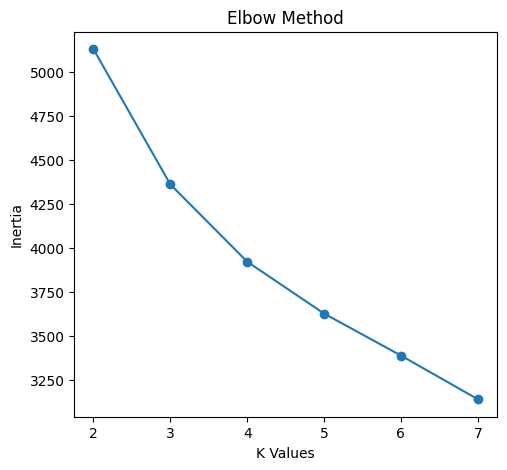

In [30]:
inertias = []
silhouettes = []
K = range(2, 8)

for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled_df)
    inertias.append(km.inertia_)

    

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertias, marker='o')
plt.xlabel("K Values")
plt.ylabel("Inertia")
plt.title("Elbow Method")

plt.show()


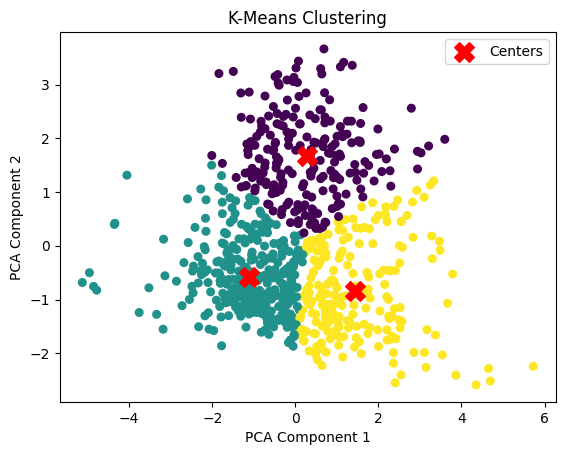

In [31]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

kmeans = KMeans(n_clusters=3, n_init=10)
labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c="red", marker="X", s=200, label="Centers")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

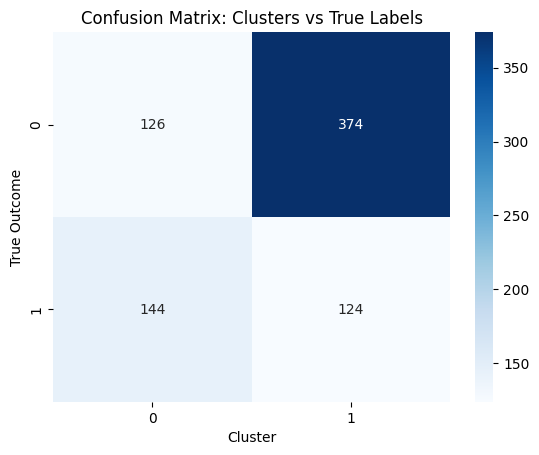

              precision    recall  f1-score   support

           0       0.47      0.25      0.33       500
           1       0.25      0.46      0.32       268

    accuracy                           0.33       768
   macro avg       0.36      0.36      0.33       768
weighted avg       0.39      0.33      0.33       768



In [32]:

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42).fit(X_scaled)
labels = kmeans.labels_

cm = confusion_matrix(y, labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Cluster")
plt.ylabel("True Outcome")
plt.title("Confusion Matrix: Clusters vs True Labels")
plt.show()

print(classification_report(y, labels))


In [46]:
# # Train KMeans directly on scaled data (8 features)
# kmeans = KMeans(n_clusters=3, n_init=10)
# labels = kmeans.fit_predict(X_scaled)

# # Test sample (must match 8 features, same order as dataset)
# test_sample = pd.DataFrame([[6, 148, 72, 35, 0, 33.6, 0.627, 50]], 
#                            columns=X.columns)

# # Scale test sample
# test_sample_scaled = scaler.transform(test_sample)

# # Predict cluster
# test_cluster = kmeans.predict(test_sample_scaled)
# print("Test sample belongs to cluster:", test_cluster[0])


Test sample belongs to cluster: 2


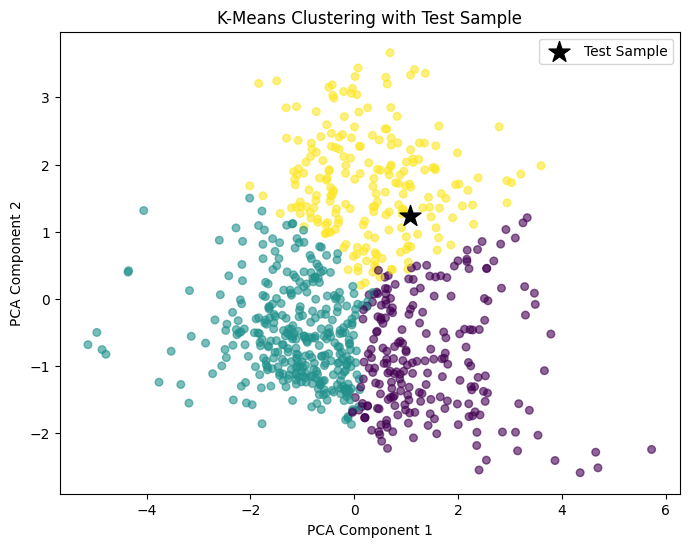

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X = df.drop(columns=['Outcome'])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


test_sample = pd.DataFrame([[6, 148, 72, 35, 0, 33.6, 0.627, 50]], 
                           columns=X.columns)

test_sample_scaled = scaler.transform(test_sample)

test_cluster = kmeans.predict(test_sample_scaled)
print("Test sample belongs to cluster:", test_cluster[0])

test_sample_pca = pca.transform(test_sample_scaled)


plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=30, alpha=0.6)
plt.scatter(test_sample_pca[:, 0], test_sample_pca[:, 1],
            c="black", marker="*", s=250, label="Test Sample")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering with Test Sample")
plt.legend()
plt.show()


In [26]:
# decision tree - id3 algorithm 

In [25]:
# decorate - evluation